In [ ]:


import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: | 

# Exracting the content in a wiki page that has 'List of US Cities by population' in to a text file

In [ ]:
link = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
page = requests.get(link) 
soup = BeautifulSoup(page.text)

# Finding the table that has the data that we need i.e. list of all cities with their population, Square Area, Location (coordinates)

In [ ]:
table = soup.find_all('table')[4]

# Extracting the table from the webpage into a data frame by specifying the column names

In [ ]:
table_rows = table.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
df = pd.DataFrame(res, columns=["Rank", "City", "State", "del1", "del2", "del3", "Sq.Area", "del5", "population density in Sq Mi", "Population density in Km2", "Location"])
df.head()

# Finding the radius of each city with the help of Sq.Area, this step involves in preprocessing of the the column Sq.Area (changing its data type to float) then finding its square root

In [ ]:
new= df["Sq.Area"].str.split("s", n=1, expand = True)
new = new[0].str.replace(u'\xa0',u'')
df["Sq.Area"] = new.str.replace(',','')
df["Sq.Area"] = df["Sq.Area"].astype(float)
df["Radius"] = np.sqrt(df["Sq.Area"])

# Drop unnecessary columns like Rank, del1, del2 ... del5, population density in Sq Mi from the data frame we extracted from the webpage

In [ ]:
df.drop(columns = ["Rank", "del1", "del2", "del3", "del5", "Sq.Area", "population density in Sq Mi"], inplace = True)
df

# Splitting the cooridnates to Latitudes and Longitudes for each city

In [23]:
#Splitting the location into latitudes and longitudes 
df["Location"]= df["Location"].str.split("/", n = 2, expand = True)[1]
df.head()

,City,State,Population density in Km2,Location
0,New York[d],New York,"10,933/km2",﻿40.6635°N 73.9387°W﻿
1,Los Angeles,California,"3,276/km2",﻿34.0194°N 118.4108°W﻿
2,Chicago,Illinois,"4,600/km2",﻿41.8376°N 87.6818°W﻿
3,Houston[3],Texas,"1,395/km2",﻿29.7866°N 95.3909°W﻿
4,Phoenix,Arizona,"1,200/km2",﻿33.5722°N 112.0901°W﻿


In [25]:
new = df["Location"].str.split(" ", n = 0, expand = False)
k = df.copy(deep = True)

In [ ]:
Longitude = []
for i in range(len(new)):
    Latitude.append(new[i][1][:-2])
    Longitude.append(new[i][2][:-3]) 

k["Latitude"] = Latitude
k["Longitude"] = Longitude
k["Latitude"] = k["Latitude"].str.replace(u'\ufeff',u'')
k.drop(columns = ["Location"], inplace = True)
k.head()
df = k.copy(deep = True)

In [16]:
df['Longitude'] = -df['Longitude'].astype(float)
df['Latitude'] = df['Latitude'].astype(float)
df['Radius'] = df['Radius']* 1000
df.head()

KeyError: 'Longitude'

# Getting the per capita income state wise for USA

In [27]:
link1 = 'https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income'
page1 = requests.get(link1) 
soup1 = BeautifulSoup(page1.text)
table = soup1.find_all('table')[1]
table_rows = table.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
df_state = pd.DataFrame(res, columns=["Rank", "Country-equivalent", "State", "Per capita income", "del2", "del3", "Population", "del5"])
df_state.head()

AssertionError: 8 columns passed, passed data had 1 columns

# Dropping unnecessary columns like Rank, del2, del3, del5 from the Table we extracted from the webpage that has population and percapita income

In [28]:
df_state.drop(columns = ['Rank','del2', 'del3', 'del5'], axis = 1, inplace = True)

NameError: name 'df_state' is not defined

In [ ]:
df_state.head()

# Plotting all the cities of USA that we have extracted from Wiki page, using their coordinates

In [ ]:
# create map of USA cities that we have using latitude and longitude values
map_tohood = folium.Map(location=[37.0902,-95.7129], zoom_start=3)

# add markers to map
for lat, lng, state, city in zip(df['Latitude'], df['Longitude'], df['State'], df['City']):
    label = '{}, {}'.format(city, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_tohood)  
    
map_tohood

# Define Four Square Credentials and version

In [ ]:
CLIENT_ID = 'AN3SMQTKLWGT3NKKC3YDJI11QUXFOGDCP4LXFGPPZVVGGN21' # your Foursquare ID
CLIENT_SECRET = 'A3OP23GQ5C1GQXBLD3QE4TLONNW0XXHWS23BWEI4V5UNMNGL' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 20
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# Function that extracts necessary columns into a data frame from the json files that we get when we search using four square API out of the values that we have in the data frame that we got from the web page

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng,radius in zip(names, latitudes, longitudes,radius):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
       # print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
df_venues = getNearbyVenues(names = df['City'], latitudes = df['Latitude'],longitudes = df['Longitude'], radius = df['Radius'])
df_venues.head()

# Assigning weights to some of the categories that Vasant wants to consider (as these are subsets of what he initially thought of)

In [ ]:
k = df_venues.copy(deep = True)
weights_dict={'Movie Theater':3,'Beach':3,'Concert Hall':2.5,'Playground':3,'Coffee Shop':3.5,'Food Court':4,'Nightclub':4,'Toy / Game Store':4.5,'Theme Park Ride / Attraction':4,'Pub':4}
data = df_venues['Venue Category']
allVenues = data.astype(list)

In [ ]:
weights = []
for i in allVenues:
    if i in weights_dict.keys():
        weights.append(weights_dict[i])
    else :
        weights.append(0)
df_venues['weights'] = weights;
df_venues.head()

In [ ]:
# Dropping the rows that we are not giving any weight
df_venues.drop(df_venues[df_venues.weights < 1.0].index, inplace=True)
df_venues.head()

# Copying only the relevants columns like city and weights to group all the venues by city and calculating the means for each city

In [ ]:
citywise_venues_weights = df_venues[['City','weights']].copy()
citywise_venues_weights_means = citywise_venues_weights.groupby(['City']).mean()
citywise_venues_weights_means = citywise_venues_weights_means.reset_index(drop=False)
citywise_venues_weights_means.head()

# Merging the table for which we calculated the means of weights city wise to the actual table that we got from the wiki page.

In [ ]:
city_selection = pd.merge(df, citywise_venues_weights_means, on='City')
city_selection = city_selection[['City','Population density in Km2','weights']].copy()
city_selection.head()


In [ ]:
# Preprocessing the population density in Km2 column as we have to normalize these values
k = city_selection.copy(deep = True)
k['Population density in Km2'] = k['Population density in Km2'].str.split("/", n = 0, expand = True)
k['Population density in Km2'] = k['Population density in Km2'].str.replace(',','')
k['Population density in Km2'] = k['Population density in Km2'].astype(float)
city_selection = k.copy(deep = True)
city_selection.head()

# Normalizing our data frame

In [ ]:
# Normalizing the data frame
from sklearn import preprocessing
column_names_to_normalize = ['Population density in Km2', 'weights']
x = city_selection[column_names_to_normalize].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
city_selection[column_names_to_normalize] = pd.DataFrame(x_scaled)
city_selection.head()

# calculating the sum of normalized columns to determine the city that has maximum sum and conclude that one locality in that city would be the best fit

In [ ]:
#calculating the sum of normalized columns to determine the city that has maximum sum and conclude that one locality in that city would be the best fit 
city_selection['sum'] = city_selection['Population density in Km2'] + city_selection['weights']
row_num = city_selection['sum'].argmax()
city_name = city_selection['City'].iloc[row_num]
city_name

In [ ]:
# Finding the state in which that city belongs
row = df.loc[df['City']== city_name].index[0]
state_name = df['State'].iloc[row]
state_name

# Vasanth was thinking that the state in which he will setup an arcade should've a percapital income of minimum of 50000 USD, let us check if that is the case with this

In [ ]:
# checking the percapita income of New Jercy 
p_row = df_state.loc[df_state['State'] == state_name].index[0]
per_capital_income = df_state['Per capita income'].iloc[p_row]
print("Per capita income of New Jercy is :", per_capital_income)

# As we have concluded that we can choose one location in Jersey City, we then check for the percapita income of the state. Since it is more than 50000 USD, it is considered as one of the best places to procced for setting up a Gaming arcade

# Let us now check which location in Jersey City would be the best to start a Gaming arcade

In [ ]:
# Getting coordinates of New Jersey
lat_newJercy = df['Latitude'].iloc[row]
long_newJercy = df['Longitude'].iloc[row]
print(lat_newJercy, long_newJercy)

# Getting all the venues of New Jersey using four square API within our considered radius and Limits

In [ ]:
# Getting the venues of New Jersey using four square API 

def getNearbyVenues1(name, latitudes, longitudes, radius):
    
    LIMIT = 150       
        # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitudes, 
            longitudes, 
            radius, 
            LIMIT)
            
        # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
   # print(results)
    venues_list=[]
    venues_list.append([(name,lat,lng,v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],v['venue']['categories'][0]['name'])for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 'Latitude', 'Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category']
    return(nearby_venues)


new_jersey_venues = getNearbyVenues1(name = 'Jersey City', latitudes = lat_newJercy ,longitudes = long_newJercy, radius = 2500)
new_jersey_venues.head()

In [ ]:
venues_in_newjersey = new_jersey_venues.copy(deep = True)
venues_in_newjersey.shape

# Since we have got 100 categories, we are now giving weights for each category for better results

In [ ]:
#copying the data frame in and giving weights for each category

k = new_jersey_venues.copy(deep = True)
new_weightage_dict= {'Coffee Shop' : 3, 
'Caribbean Restaurant':3,
'Distillery':2,
'Fish & Chips Shop':3,
'Science Museum':3,
'Latin American Restaurant':4,
'Restaurant':5,
'State / Provincial Park':1,
'Diner':1,
'Supermarket':1,
'Bar':1,
'Jazz Club':1,
'Golf Course':3,
'Park':2,
'Cajun / Creole Restaurant':2,
'Bakery':2,
'Go Kart Track':3,
'Taco Place':3,
'Hot Dog Joint':2,
'Food Truck':3,
'Beer Garden':3,
'Boutique':4,
'Café':5,
'Bagel Shop':1,
'Record Shop':1,
'Bakery':1,
'Pizza Place':1,
'Ramen Restaurant':1,
'Wine Bar':3,
'Middle Eastern Restaurant':2,
'French Restaurant':2,
'Theater':2,
'Lounge':3,
'Wine Shop':3,
'Cocktail Bar':2,
'New American Restaurant':3,
'Residential Building (Apartment / Condo)':3,
'Pool':4,
'Burger Joint':5,
'Cheese Shop':1,
'Coffee Shop':1,
'Bagel Shop':1,
'Vietnamese Restaurant':1,
'Portuguese Restaurant':1,
'Ice Cream Shop':3,
'Italian Restaurant':2,
'Gym':2,
'Farmers Market':2,
'Bar':3,
'Pizza Place':3,
'Bakery':2,
'Bookstore':3,
'Bar':3,
'Farmers Market':4,
'Asian Restaurant':5,
'Tea Room':1,
'Donut Shop':1,
'Historic Site':1,
'Gym / Fitness Center':1,
'Café':1,
'Mexican Restaurant':3,
'Plaza':2,
'Gay Bar':2,
'Bar':3,
'College Administrative Building':3,
'Mexican Restaurant':2,
'Bakery':3,
'American Restaurant':3,
'American Restaurant':4,
'American Restaurant':5,
'Café':1,
'New American Restaurant':1,
'Chocolate Shop':1,
'Gym':1,
'Grocery Store':1,
'Middle Eastern Restaurant':3,
'American Restaurant':2,
'Frozen Yogurt Shop':2,
'Japanese Restaurant':2,
'Bar':3,
'Liquor Store':3,
'Ice Cream Shop':2,
'Fish Market':3,
'Indie Movie Theater':3,
'Grocery Store':4,
'Modern European Restaurant':5,
'American Restaurant':1,
'Poke Place':1,
'Ramen Restaurant':1,
'Diner':1,
'Brewery':1,
'Burger Joint':3,
'Burger Joint':2,
'Café':2,
'Fried Chicken Joint':2,
'Beer Garden':3,
'Gym / Fitness Center':3,
'Vietnamese Restaurant':2,
'Italian Restaurant':3,
'Pet Store':3}

# Plotting all the venues that we have got from the Four Square API

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# create map of the venues that we have using latitude and longitudes
venues_map = folium.Map(location=[lat_newJercy, long_newJercy], zoom_start=15) # generate map centred around Jersey city


# add Jersey City as a red circle mark
folium.features.CircleMarker(
    [lat_newJercy, long_newJercy],
    radius=10,
    popup='Jersey city',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

In [ ]:
# add all the venuew of the Jersey city to the map as blue circle markers
for lat, lng, label in zip(venues_in_newjersey['Venue Latitude'], venues_in_newjersey['Venue Longitude'], venues_in_newjersey['Venue']):
    label=folium.Popup(label,parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html = False).add_to(venues_map)
venues_map


# Assigning weights to each category, same as we gave for each city

In [ ]:
# Calculating new weights for our data frame as we have given weights for all categories

allVenuesinCity1 = k['Venue Category']

f_weights1 = []
for i in allVenuesinCity1:
    if i in new_weightage_dict.keys():
        f_weights1.append(new_weightage_dict[i])
    else :
        f_weights1.append(0)
k['weights'] = f_weights1;
k.head()


In [ ]:
# Dropping unnecessary columns 

newframe = k[['City','Venue Category','weights']].copy()
newframe = k.groupby(['Venue Category']).mean()
newframe.drop(columns = ["Latitude", "Longitude"], inplace = True)
newframe


# Using K Means algorithm to cluster the venues and calculating the weights for each cluster to decide which cluster would be the best area to install a gaming arcade

In [ ]:
# Cluster them using K means algorithm 
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
#Standardize
clmns = ['weights','Venue Latitude', 'Venue Longitude']
df_tr_std = stats.zscore(newframe[clmns])
#Cluster the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_
newframe['clusters'] = labels
#Add the column into our list
clmns.extend(['clusters'])
#Lets analyze the clusters
kframe = newframe[clmns].groupby(['Venue Category']).mean()
kframe = kframe.reset_index(drop = False)
kframe.head()

In [ ]:
#new group by clusters and add weights of each cluster 
finalWeight = kframe.groupby(['clusters']).mean()
finalWeight

In [ ]:
# Final coordinates of the place where we will be setting up an arcade is the one that has maximum weight for, in the above data frame
lat1 = 40.720102
long1 = -74.048121

# As we have a location with the maximum weight, let us plot the same in the graph with a circle of radius 50M such that Vasanth can install his arcade with in that premices

In [ ]:
# create map of the venues that we have using latitude and longitudes
final_map = folium.Map(location=[lat1, long1], zoom_start=15) # generate map centred around Jersey city


# add prefered location in the City as a green circle mark
folium.features.CircleMarker(
    [lat1, long1],
    radius=50,
    popup='Gaming arcade can be installed within this circle',
    fill=True,
    color='green',
    fill_color='green',
    fill_opacity=0.6
    ).add_to(final_map)
final_map

# So, we finally got a better place in the Jersey city
This place is between the Groove Street and the Grand Street, hence it would also have the best footfall and potential customers as well.
Further Enhancements and drawbacks in continuing this approach :
This project can be enhanced by considering many more attributes to define the weights and do the analysis and also by extending the LIMIT and Radius of the search that we are giving to extract the number of venues. As we have an API limit in the free trail of four square API we had to limit our search within a small Radius.
Also, further enhancements could be, we have hardcorded the radius to 2500 around the Jercey city but the city radius might be more or less than that (actually more). Hence based on the weights we gave our cluster might go to other city if the radius is more than what it actually is.

# Vasanth a CEO of a Gaming company wants to set up a gaming arcade in USA. Where would be the best place to install an arcade?

# Final Report
By Aniketh Reddy Mustoor

keywords: Gaming Arcade, Machine Learning, K Means, Python, Data Science, Normalization, Merging, Beautiful Soup

# Business Understanding
Installing a Gaming arcade in a place should be done strategically.

* Firstly, you should know why to start off with a place in particular?
* If a place is chosen, you must have a very clear understanding of who would your potential customers be?
* You need to have a clear understanding of the customers spending patterns in that locality etc.
* Last but not the least, you need to take care of the legal aspects involved in that locality.

# A brief about the Data:
Here's some brief about the locaions in particular(source: wikipedia):

As defined by the United States Census Bureau, an "incorporated place" includes a variety of designations, including city, town, village, borough, and municipality. A few exceptional census-designated places (CDPs) are also included in the Census Bureau's listing of incorporated places. Consolidated city-counties represent a distinct type of government that includes the entire population of a county, or county equivalent. Some consolidated city-counties, however, include multiple incorporated places.

About the State income levels: State income levels and income data for the United States as a whole are included for comparison. Note that county-equivalents in Louisiana are called "parishes" and in Alaska are called in "boroughs," and also that in Alaska census areas in the Unorganized Borough are county-equivalents. For states where independent cities are county-equivalents, the word "city" is included to identify the independent cities and to differentiate them from counties with identical names; the counties with the identical names have the word "county" following them. The word "county" is included in the names of counties that have names identical to the names of U.S. states or cities to differentiate them.

# Problem
Considering all the constraints pertaining to the data and weights for each category of the venue, what is the best location in USA to set up a gaming arcade?

# Tools we need:
* Foursquare API
* IBM Watson Account
* List of United States countries by per capita income
* List of United States cities by population
* Jupiter Notebooks

# Methodology
In order to do the analysis and suggest the best location, following are the steps we have to follow :

* The Wikipedia page (https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population) was scraped using the BeautifulSoup library to build a pandas dataframe listing the cities, states, coordinates, area and population density. The dataframe was cleaned and processed appropriately.
* The Wikipedia page (https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income) was scraped using the BeautifulSoup library to build a pandas dataframe listing the cities, states and percapita income. The dataframe was cleaned and processed appropriately.
* The Foursquare API is then used to get the venues in each city of United States
* Based on the categories of each venue as decided by the CEO, we have assigned weights to each of them and got the city that has the maximum weight.
* Once the city is finalized, we again use Four Square API to get the venues within that city and assign weights to each category.
* We will now use K means to cluster the venues based on the category and get the coordinates of the cluster that has maximum weight which is also our preferred location to setup a gaming arcade.

# Result :
Based on the analysis we have done, the following is the result we have got:

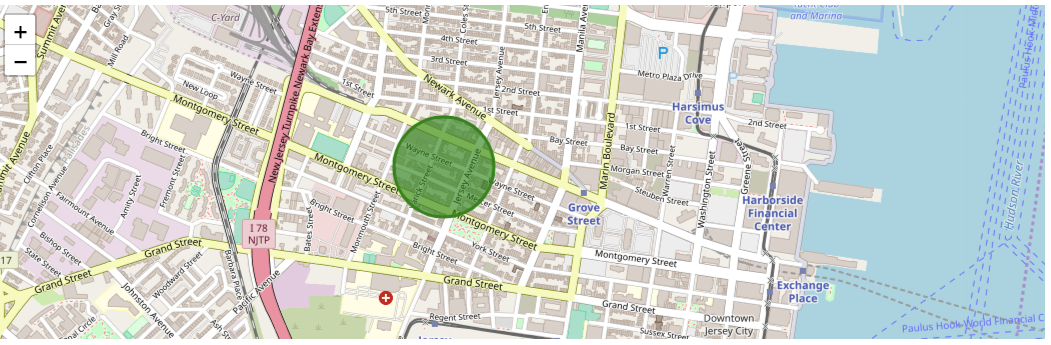

# Discusions and further Improvements
* In the Four Square API, we have queried the Venues of a locality by specifying the LIMIT and Radius of our choice. We have chosen less LIMIT as the number of API calls that can be done using a free account in Four Square are less. We can increase the limit for more accurate results.

* In the venue categories we are choosing only few out of 2000 that are available to give weights and identify the best cluster. Hence, assigning weights must be done relatively for each category and then considering more number of venue categories would actually yield better output.

# Conclusions:
Based on the given constraints, a gaming arcade can be installed in a place closer to the center of the circle to attract more number of diverse customers and get huge revenue.

# Resources :
* List of all the cities in United States with population density and coordinates: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population
* List of all the cities in United States with Per Capita Income : https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income
* Four Square API : https://foursquare.com